In [13]:
#### 模型构造
from keras.applications import VGG16 
from keras import optimizers 
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

from keras import models
from keras import layers 
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = True 
set_trainable = False
for layer in conv_base.layers:
         if layer.name == 'block5_conv1':
             set_trainable = True
         if set_trainable:
             layer.trainable = True
         else:
             layer.trainable = False


model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc']) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
#### 数据准备

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
base_dir = '/home/jovyan/work/newCatAndDog' 
# base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers 
train_datagen = ImageDataGenerator(
                                     rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
                                     train_dir, 
                                     target_size=(150, 150), 
                                     batch_size=20,
                                     class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
                                     validation_dir,
                                     target_size=(150, 150),
                                     batch_size=20,
                                     class_mode='binary') 

Found 5000 images belonging to 2 classes.
Found 998 images belonging to 2 classes.


In [9]:
#### 模型训练
history = model.fit(
                     train_generator,
                     steps_per_epoch=100,
                     epochs=20,
                     validation_data=validation_generator,
                     validation_steps=50)

Epoch 1/20


2023-06-18 04:02:28.983178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.4327 - acc: 0.8025

2023-06-18 04:04:11.468924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 138s 1s/step - loss: 0.4327 - acc: 0.8025 - val_loss: 0.2807 - val_acc: 0.8818
Epoch 2/20
100/100 [==============================] - 115s 1s/step - loss: 0.3286 - acc: 0.8555 - val_loss: 0.3030 - val_acc: 0.8647
Epoch 3/20
100/100 [==============================] - 115s 1s/step - loss: 0.2966 - acc: 0.8645 - val_loss: 0.2281 - val_acc: 0.9008
Epoch 4/20
100/100 [==============================] - 116s 1s/step - loss: 0.2810 - acc: 0.8800 - val_loss: 0.2203 - val_acc: 0.9008
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 0.2799 - acc: 0.8785 - val_loss: 0.2616 - val_acc: 0.8988
Epoch 6/20
100/100 [==============================] - 115s 1s/step - loss: 0.2707 - acc: 0.8850 - val_loss: 0.2092 - val_acc: 0.9038
Epoch 7/20
100/100 [==============================] - 115s 1s/step - loss: 0.2508 - acc: 0.8845 - val_loss: 0.2019 - val_acc: 0.9098
Epoch 8/20
100/100 [==============================] - 116s 1s/step - loss: 0.238

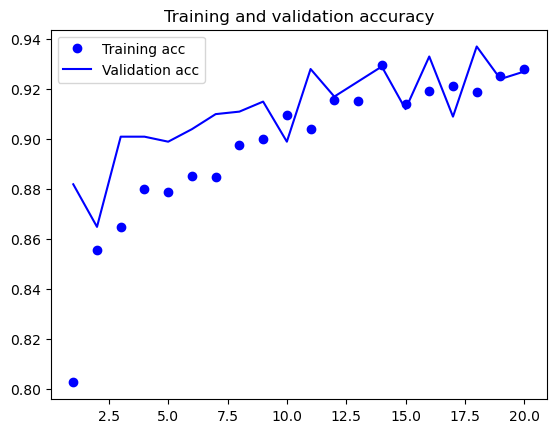

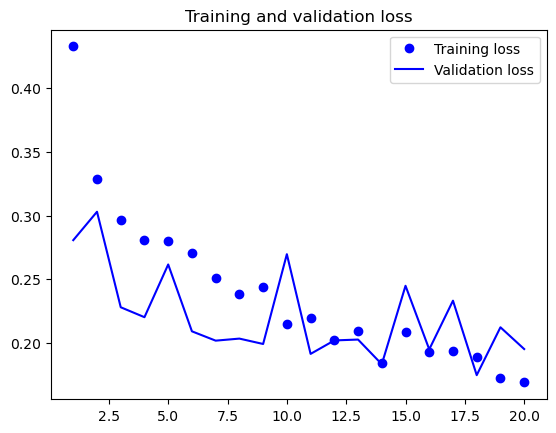

In [12]:
#### 结果展示
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()



ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

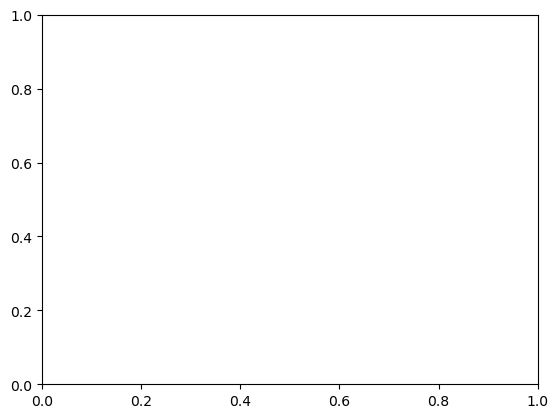

In [11]:

#### 平滑曲线
def smooth_curve(points, factor=0.8):
 smoothed_points = []
 for point in points:
     if smoothed_points:
         previous = smoothed_points[-1]
         smoothed_points.append(previous * factor + point * (1 - factor))
     else:
         smoothed_points.append(point)
     return smoothed_points 
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()